In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('Performance_dailytrader.csv', parse_dates=['boughtTimestamp', 'soldTimestamp'])
df2 = pd.read_csv('Performance_APEX.csv', parse_dates=['boughtTimestamp', 'soldTimestamp'])
df = pd.concat([df, df2], axis=0)
df.head()

,symbol,_priceFormat,_priceFormatType,_tickSize,buyFillId,sellFillId,qty,buyPrice,sellPrice,pnl,boughtTimestamp,soldTimestamp,duration
0,NQU3,-2,0,0.25,17923520048,17923520007,2,15362.50,15341.75,$(830.00),2023-08-29 11:34:43,2023-08-29 11:29:26,5min 16sec
1,NQU3,-2,0,0.25,17923520062,17923520126,2,15371.25,15372.50,$50.00,2023-08-29 11:37:21,2023-08-29 11:48:21,10min 59sec
2,NQU3,-2,0,0.25,17923520193,17923520137,2,15373.00,15373.25,$10.00,2023-08-29 11:50:11,2023-08-29 11:49:45,25sec
3,NQU3,-2,0,0.25,17923520238,17923520210,2,15370.75,15370.75,$0.00,2023-08-29 11:50:58,2023-08-29 11:50:32,26sec
4,NQU3,-2,0,0.25,17923520273,17923520252,48,15375.50,15375.75,$240.00,2023-08-29 11:53:10,2023-08-29 11:52:27,43sec


In [3]:
for column in df.columns:
    unique_value = df[column].unique()
    print(f'unique_value of column {column} are {unique_value}')

unique_value of column symbol are ['NQU3' 'MNQU3']
unique_value of column _priceFormat are [-2]
unique_value of column _priceFormatType are [0]
unique_value of column _tickSize are [0.25]
unique_value of column buyFillId are [17923520048 17923520062 17923520193 17923520238 17923520273 17923520301
 17923520316 17923520347 17923520358 17923520378 17923520407 17923520427
 17923520438 17923520458 17923520516 17923520543 17923520551 17923520574
 17923520585 17923520676 17923520706 17923520714 17923520722 17923520752
 17923520760 17923520783 17923520810 17923520818 17923520865 17923520896
 17923520904 17923520912 17923520996 17923521004 17923521012 17923521077
 17923521085 17923521093 17923521116 17923521155 17923521185 17923521193
 17923521231 17923521281 17923521312 17923521348 17923521422 17923521460
 17923521494 17923521502 17923521516 17923521606 17923521684 17923521692
 17923521755 17923521798 17923522003 17923522075 17923522095 17923522224
 17923522263 17923522309 17923522353 17923522

In [4]:
df.drop(columns=['symbol','_priceFormat', '_priceFormatType', '_tickSize','buyFillId', 'sellFillId'], inplace=True)
df.head()

,qty,buyPrice,sellPrice,pnl,boughtTimestamp,soldTimestamp,duration
0,2,15362.50,15341.75,$(830.00),2023-08-29 11:34:43,2023-08-29 11:29:26,5min 16sec
1,2,15371.25,15372.50,$50.00,2023-08-29 11:37:21,2023-08-29 11:48:21,10min 59sec
2,2,15373.00,15373.25,$10.00,2023-08-29 11:50:11,2023-08-29 11:49:45,25sec
3,2,15370.75,15370.75,$0.00,2023-08-29 11:50:58,2023-08-29 11:50:32,26sec
4,48,15375.50,15375.75,$240.00,2023-08-29 11:53:10,2023-08-29 11:52:27,43sec


In [5]:
df.columns

Index(['qty', 'buyPrice', 'sellPrice', 'pnl', 'boughtTimestamp',
       'soldTimestamp', 'duration'],
      dtype='object')

In [6]:
pattern = r'\((-?\d+\.\d+)\)'
# match = re.search(pattern, input_string)

In [7]:
def replace_and_convert(match):
    number_in_parentheses = float(match.group(1))
    if number_in_parentheses > 0:
        number_in_parentheses = -number_in_parentheses
    return str(number_in_parentheses)

In [8]:
def convert_to_timedelta(duration_str):
    parts = duration_str.split()
    total_seconds = 0
    
    for part in parts:
        if 'min' in part:
            total_seconds += int(part.replace('min', '')) * 60
        elif 'sec' in part:
            total_seconds += int(part.replace('sec', ''))
            
    return pd.Timedelta(seconds=total_seconds)
            

In [9]:
df['pnl'] = df['pnl'].apply(lambda x: x.replace('$', '').replace(',', ''))
df['pnl'] = df['pnl'].apply(lambda x: re.sub(pattern, replace_and_convert, x))
df['pnl'] = df['pnl'].apply(lambda x: float(x))
df['qty'] = df['qty'].apply(lambda x: int(x))
df['duration'] = df['duration'].apply(convert_to_timedelta)

In [10]:
df.head()

,qty,buyPrice,sellPrice,pnl,boughtTimestamp,soldTimestamp,duration
0,2,15362.50,15341.75,-830.0,2023-08-29 11:34:43,2023-08-29 11:29:26,0 days 00:05:16
1,2,15371.25,15372.50,50.0,2023-08-29 11:37:21,2023-08-29 11:48:21,0 days 00:10:59
2,2,15373.00,15373.25,10.0,2023-08-29 11:50:11,2023-08-29 11:49:45,0 days 00:00:25
3,2,15370.75,15370.75,0.0,2023-08-29 11:50:58,2023-08-29 11:50:32,0 days 00:00:26
4,48,15375.50,15375.75,240.0,2023-08-29 11:53:10,2023-08-29 11:52:27,0 days 00:00:43


In [11]:
# df_sub = df[(df['boughtTimestamp'].dt.hour <= 12) & (df['qty'] <= 10)]
# df_sub = df[(df['pnl'] > 0) & (df['qty'] <= 2) & (df['boughtTimestamp'].dt.hour <= 12)]
df.groupby(df['boughtTimestamp'].dt.date)[['pnl', 'qty', 'duration']].describe()

pnl                                                        \
                 count        mean          std      min   25%   50%     75%   
boughtTimestamp                                                                
2023-08-29        50.0 -399.700000  2333.122505 -11520.0  10.0  37.5  240.00   
2023-09-01         5.0   76.000000   165.015151    -20.0   0.0  10.0   20.00   
2023-09-05        22.0  120.681818   525.004071   -890.0  -7.5  40.0  230.00   
2023-09-06         1.0    3.000000          NaN      3.0   3.0   3.0    3.00   
2023-09-07       110.0  -71.500000   609.102796  -3050.0   0.0  25.0   86.25   
2023-09-08        53.0    3.566038   101.394414   -280.0 -10.0  10.0   40.00   

                           qty             ...             duration  \
                    max  count       mean  ...   75%   max    count   
boughtTimestamp                            ...                        
2023-08-29       2070.0   50.0  15.320000  ...  24.0  48.0       50   
2023-09-01        370.0    5.0   1.600000  ...   2.0   2.0        5   
2023-09-05       2160.0   22.0   4.636364  ...   3.5  36.0       22   
2023-09-06          3.0    1.0   2.000000  ...   2.0   2.0        1   
2023-09-07        900.0  110.0   5.418182  ...  10.0  10.0      110   
2023-09-08        410.0   53.0   1.547170  ...   2.0   2.0       53   

                                                                       \
                                      mean                        std   
boughtTimestamp                                                         
2023-08-29          0 days 00:01:43.660000  0 days 00:02:46.426990795   
2023-09-01          0 days 00:00:45.200000  0 days 00:00:28.700174215   
2023-09-05       0 days 00:03:06.454545454  0 days 00:04:42.108848846   
2023-09-06                 0 days 00:00:02                        NaT   
2023-09-07       0 days 00:01:22.390909090  0 days 00:02:37.456334151   
2023-09-08       0 days 00:00:22.169811320  0 days 00:00:19.041185977   

                                                          \
                             min                     25%   
boughtTimestamp                                            
2023-08-29       0 days 00:00:02         0 days 00:00:21   
2023-09-01       0 days 00:00:21         0 days 00:00:22   
2023-09-05       0 days 00:00:03         0 days 00:00:34   
2023-09-06       0 days 00:00:02         0 days 00:00:02   
2023-09-07       0 days 00:00:01  0 days 00:00:15.250000   
2023-09-08       0 days 00:00:01         0 days 00:00:08   

                                                                 \
                                    50%                     75%   
boughtTimestamp                                                   
2023-08-29       0 days 00:00:36.500000  0 days 00:01:20.750000   
2023-09-01              0 days 00:00:31         0 days 00:01:10   
2023-09-05              0 days 00:01:59         0 days 00:03:07   
2023-09-06              0 days 00:00:02         0 days 00:00:02   
2023-09-07              0 days 00:00:35         0 days 00:01:13   
2023-09-08              0 days 00:00:20         0 days 00:00:28   

                                  
                             max  
boughtTimestamp                   
2023-08-29       0 days 00:10:59  
2023-09-01       0 days 00:01:22  
2023-09-05       0 days 00:21:12  
2023-09-06       0 days 00:00:02  
2023-09-07       0 days 00:22:47  
2023-09-08       0 days 00:01:25  

[6 rows x 24 columns]

In [12]:
df.groupby(df['boughtTimestamp'].dt.date)[['pnl', 'qty', 'duration']].sum()

,pnl,qty,duration
boughtTimestamp,,,
2023-08-29,-19985.0,766,0 days 01:26:23
2023-09-01,380.0,8,0 days 00:03:46
2023-09-05,2655.0,102,0 days 01:08:22
2023-09-06,3.0,2,0 days 00:00:02
2023-09-07,-7865.0,596,0 days 02:31:03
2023-09-08,189.0,82,0 days 00:19:35


In [13]:
df_sub = df[(df['boughtTimestamp'].dt.hour <= 12) & (df['qty'] <= 10)]
# df_sub = df[(df['pnl'] > 0) & (df['qty'] <= 2) & (df['boughtTimestamp'].dt.hour <= 12)]
df_sub.groupby(df_sub['boughtTimestamp'].dt.date)[['pnl', 'qty', 'duration']].describe()

pnl                                                        \
                count        mean         std     min     25%    50%    75%   
boughtTimestamp                                                               
2023-08-29       19.0 -108.157895  416.724031 -1620.0   10.00   15.0   30.0   
2023-09-01        1.0  370.000000         NaN   370.0  370.00  370.0  370.0   
2023-09-05       14.0   -3.571429  303.482534  -890.0  -22.50   40.0  150.0   
2023-09-07       38.0   92.763158  346.401769  -920.0   11.25   35.0  127.5   
2023-09-08       17.0   50.764706  115.379553  -120.0    0.00   10.0   50.0   

                         qty            ...             duration  \
                   max count      mean  ...   75%   max    count   
boughtTimestamp                         ...                        
2023-08-29       120.0  19.0  2.368421  ...   3.0   9.0       19   
2023-09-01       370.0   1.0  2.000000  ...   2.0   2.0        1   
2023-09-05       380.0  14.0  2.285714  ...   2.0   6.0       14   
2023-09-07       900.0  38.0  5.421053  ...  10.0  10.0       38   
2023-09-08       410.0  17.0  1.647059  ...   2.0   2.0       17   

                                                                       \
                                      mean                        std   
boughtTimestamp                                                         
2023-08-29       0 days 00:02:19.052631578  0 days 00:03:17.233497742   
2023-09-01                 0 days 00:01:10                        NaT   
2023-09-05       0 days 00:04:08.428571428  0 days 00:05:39.020696959   
2023-09-07       0 days 00:00:34.842105263  0 days 00:00:43.316887859   
2023-09-08       0 days 00:00:18.705882352  0 days 00:00:21.250778532   

                                                                           \
                             min                     25%              50%   
boughtTimestamp                                                             
2023-08-29       0 days 00:00:19  0 days 00:00:21.500000  0 days 00:00:51   
2023-09-01       0 days 00:01:10         0 days 00:01:10  0 days 00:01:10   
2023-09-05       0 days 00:00:03  0 days 00:00:56.250000  0 days 00:02:24   
2023-09-07       0 days 00:00:02  0 days 00:00:10.500000  0 days 00:00:22   
2023-09-08       0 days 00:00:01         0 days 00:00:05  0 days 00:00:10   

                                                   
                             75%              max  
boughtTimestamp                                    
2023-08-29       0 days 00:01:44  0 days 00:10:59  
2023-09-01       0 days 00:01:10  0 days 00:01:10  
2023-09-05       0 days 00:04:10  0 days 00:21:12  
2023-09-07       0 days 00:00:35  0 days 00:03:36  
2023-09-08       0 days 00:00:23  0 days 00:01:25  

[5 rows x 24 columns]

In [14]:
df_sub.groupby(df_sub['boughtTimestamp'].dt.date)[['pnl', 'qty', 'duration']].sum()


,pnl,qty,duration
boughtTimestamp,,,
2023-08-29,-2055.0,45,0 days 00:44:02
2023-09-01,370.0,2,0 days 00:01:10
2023-09-05,-50.0,32,0 days 00:57:58
2023-09-07,3525.0,206,0 days 00:22:04
2023-09-08,863.0,28,0 days 00:05:18


In [15]:
df_sub = df[(df['boughtTimestamp'].dt.hour <= 12) & (df['qty'] <= 2)]
# df_sub = df[(df['pnl'] > 0) & (df['qty'] <= 2) & (df['boughtTimestamp'].dt.hour <= 12)]
df_sub.groupby(df_sub['boughtTimestamp'].dt.date)[['pnl', 'qty', 'duration']].describe()

pnl                                                      \
                count        mean         std    min    25%    50%    75%   
boughtTimestamp                                                             
2023-08-29       13.0  -56.538462  234.221980 -830.0   10.0   10.0   15.0   
2023-09-01        1.0  370.000000         NaN  370.0  370.0  370.0  370.0   
2023-09-05       12.0  -44.166667  310.262597 -890.0  -47.5   25.0   60.0   
2023-09-07       17.0  -20.000000  256.143270 -920.0   10.0   20.0   30.0   
2023-09-08       17.0   50.764706  115.379553 -120.0    0.0   10.0   50.0   

                         qty            ...           duration  \
                   max count      mean  ...  75%  max    count   
boughtTimestamp                         ...                      
2023-08-29        50.0  13.0  1.384615  ...  2.0  2.0       13   
2023-09-01       370.0   1.0  2.000000  ...  2.0  2.0        1   
2023-09-05       380.0  12.0  1.833333  ...  2.0  2.0       12   
2023-09-07       340.0  17.0  1.588235  ...  2.0  2.0       17   
2023-09-08       410.0  17.0  1.647059  ...  2.0  2.0       17   

                                                                       \
                                      mean                        std   
boughtTimestamp                                                         
2023-08-29       0 days 00:02:23.615384615  0 days 00:03:30.788811555   
2023-09-01                 0 days 00:01:10                        NaT   
2023-09-05       0 days 00:04:38.083333333  0 days 00:05:58.173766445   
2023-09-07       0 days 00:00:36.529411764  0 days 00:00:31.630913769   
2023-09-08       0 days 00:00:18.705882352  0 days 00:00:21.250778532   

                                                          \
                             min                     25%   
boughtTimestamp                                            
2023-08-29       0 days 00:00:21         0 days 00:00:22   
2023-09-01       0 days 00:01:10         0 days 00:01:10   
2023-09-05       0 days 00:00:08  0 days 00:01:28.750000   
2023-09-07       0 days 00:00:08         0 days 00:00:13   
2023-09-08       0 days 00:00:01         0 days 00:00:05   

                                                                 \
                                    50%                     75%   
boughtTimestamp                                                   
2023-08-29              0 days 00:00:51         0 days 00:01:44   
2023-09-01              0 days 00:01:10         0 days 00:01:10   
2023-09-05       0 days 00:02:36.500000  0 days 00:04:22.250000   
2023-09-07              0 days 00:00:23         0 days 00:00:48   
2023-09-08              0 days 00:00:10         0 days 00:00:23   

                                  
                             max  
boughtTimestamp                   
2023-08-29       0 days 00:10:59  
2023-09-01       0 days 00:01:10  
2023-09-05       0 days 00:21:12  
2023-09-07       0 days 00:01:53  
2023-09-08       0 days 00:01:25  

[5 rows x 24 columns]

In [16]:
df_sub.groupby(df_sub['boughtTimestamp'].dt.date)[['pnl', 'qty', 'duration']].sum()


,pnl,qty,duration
boughtTimestamp,,,
2023-08-29,-735.0,18,0 days 00:31:07
2023-09-01,370.0,2,0 days 00:01:10
2023-09-05,-530.0,22,0 days 00:55:37
2023-09-07,-340.0,27,0 days 00:10:21
2023-09-08,863.0,28,0 days 00:05:18


In [17]:
df_sub['pnl'].sum()

-372.0

In [18]:
df_sub.describe()

,qty,buyPrice,sellPrice,pnl,boughtTimestamp,soldTimestamp,duration
count,60.000000,60.000000,60.000000,60.000000,60,60,60
mean,1.616667,15361.550000,15361.608333,-6.200000,2023-09-05 08:02:06.266666752,2023-09-05 08:00:56.950000128,0 days 00:01:43.550000
min,1.000000,15231.000000,15231.750000,-920.000000,2023-08-29 11:34:43,2023-08-29 11:29:26,0 days 00:00:01
25%,1.000000,15271.750000,15268.937500,0.000000,2023-09-05 11:38:55,2023-09-05 11:35:37.249999872,0 days 00:00:13.750000
50%,2.000000,15338.625000,15338.750000,15.000000,2023-09-07 10:42:28.500000,2023-09-07 10:42:49,0 days 00:00:26
75%,2.000000,15372.625000,15373.062500,40.000000,2023-09-08 12:22:37.750000128,2023-09-08 12:22:28.249999872,0 days 00:01:27
max,2.000000,15558.000000,15558.250000,410.000000,2023-09-08 12:50:25,2023-09-08 12:50:01,0 days 00:21:12
std,0.490301,102.675973,102.525424,233.982746,NaN,NaN,0 days 00:03:28.052342257


In [19]:
df_sub.groupby(df_sub.boughtTimestamp.dt.quarter)['pnl'].describe()

,count,mean,std,min,25%,50%,75%,max
boughtTimestamp,,,,,,,,
3,60.0,-6.2,233.982746,-920.0,0.0,15.0,40.0,410.0


C:\Users\Farhad\AppData\Local\Temp\ipykernel_6680\3139245389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['timestamp_string'] = df_sub['boughtTimestamp'].dt.strftime('%y-%m-%d %H:%M:%S')
C:\Users\Farhad\AppData\Local\Temp\ipykernel_6680\3139245389.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.drop_duplicates(subset='timestamp_string', keep = 'first', inplace=True)
C:\Users\Farhad\AppData\Local\Temp\ipykernel_6680\3139245389.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

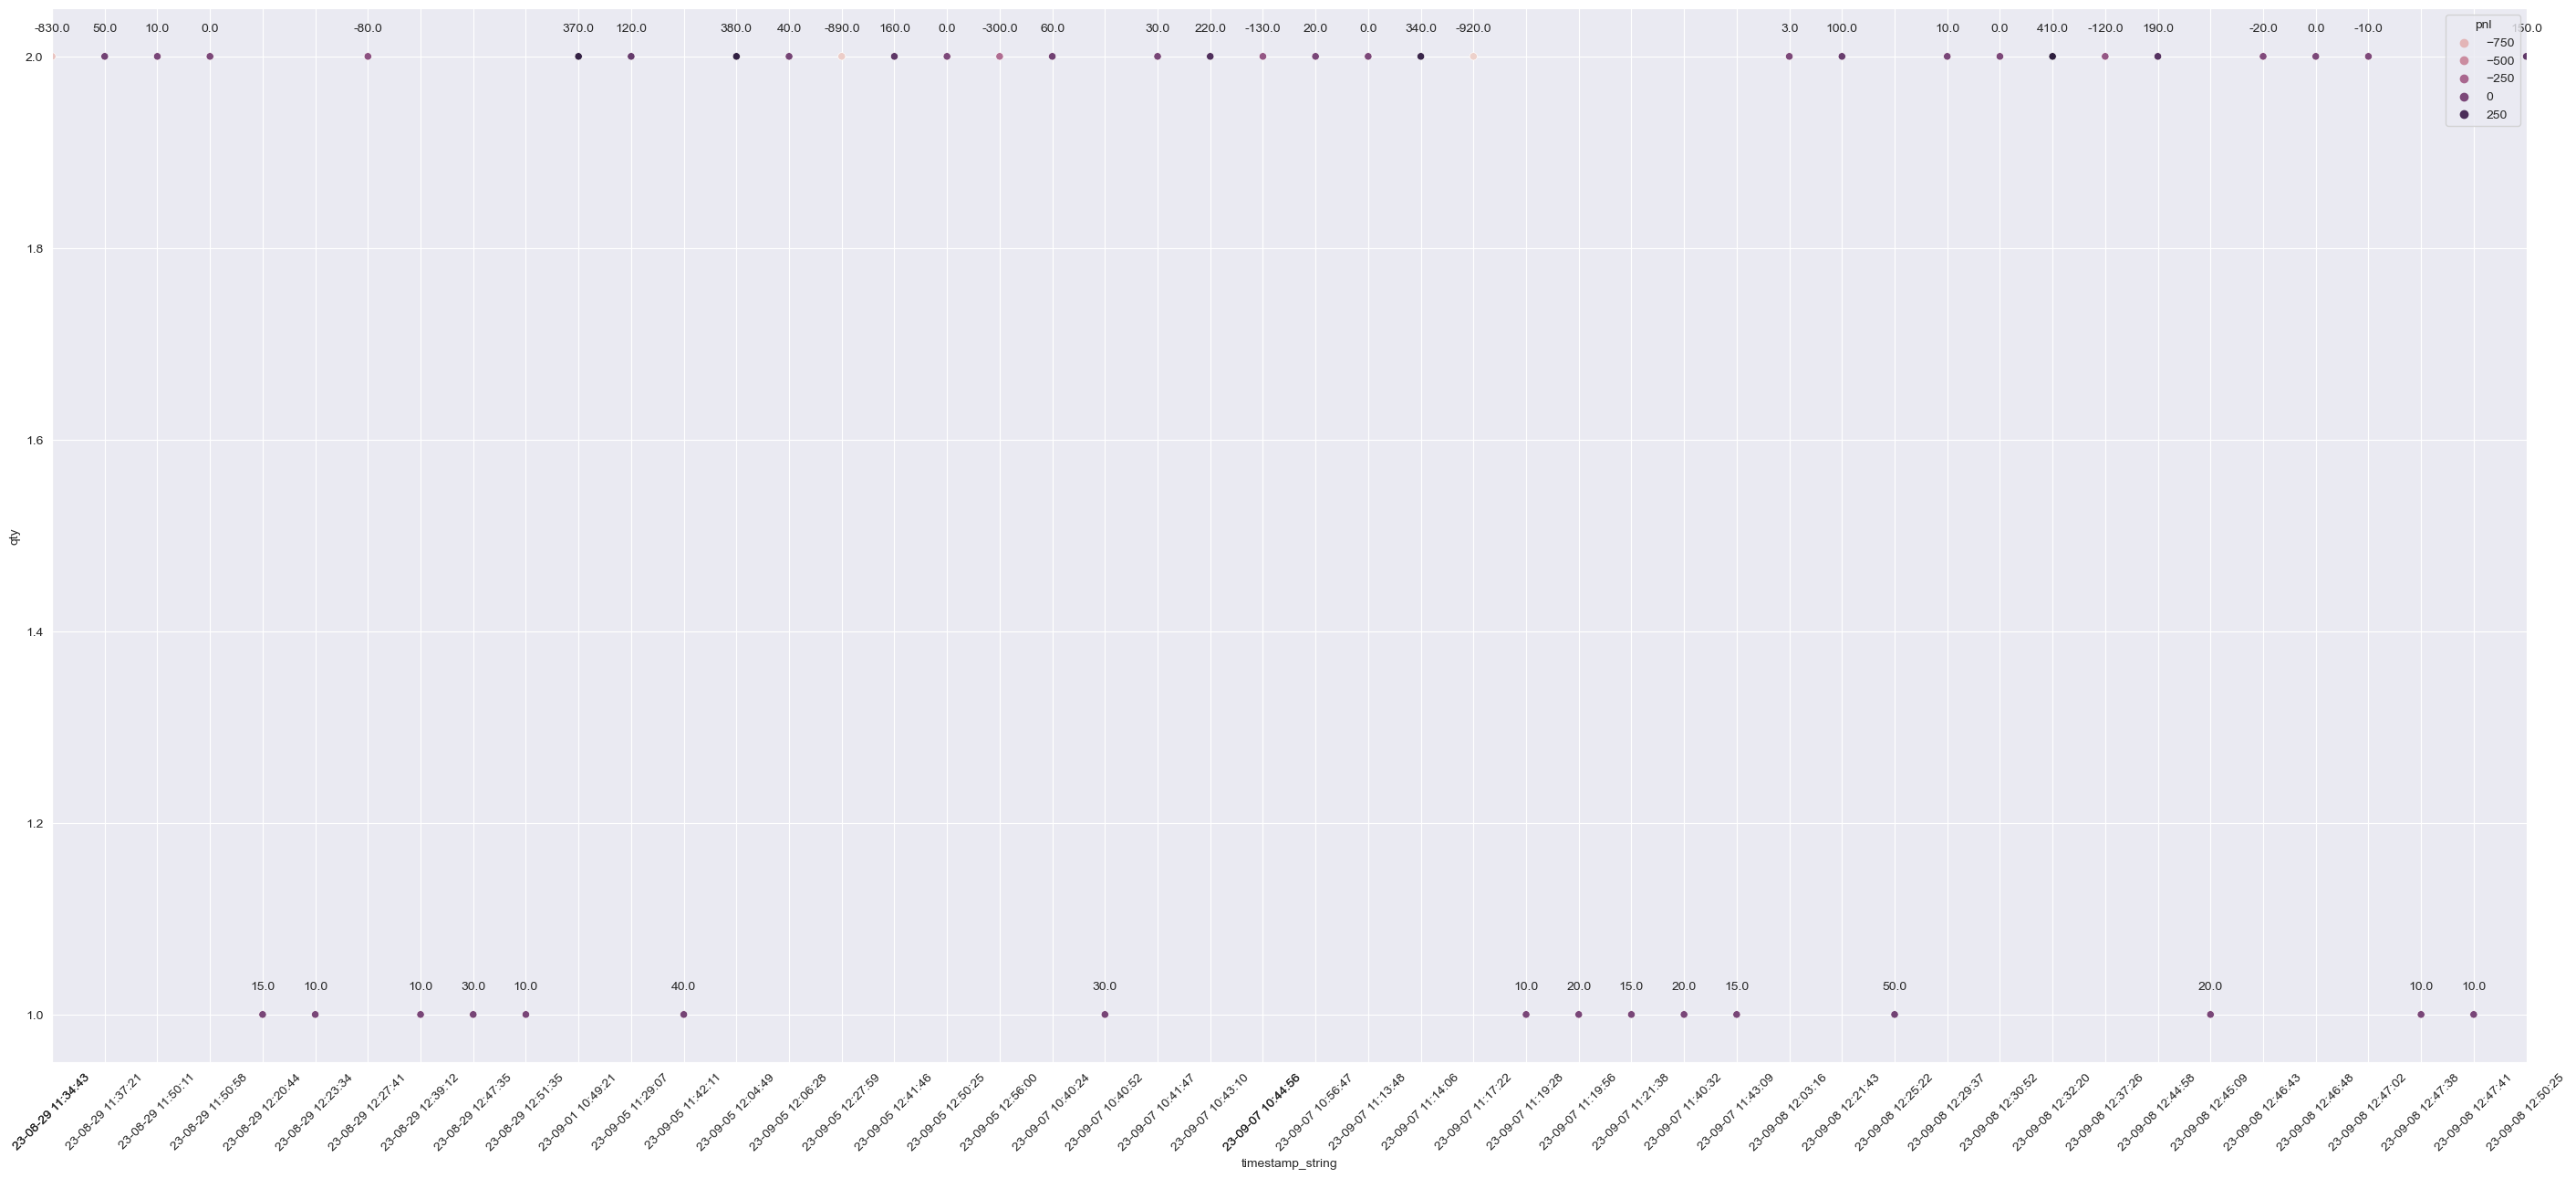

In [20]:
plt.figure(figsize=(35, 15))
# Create a scatter plot using Seaborn
df_sub['timestamp_string'] = df_sub['boughtTimestamp'].dt.strftime('%y-%m-%d %H:%M:%S')

df_sub.groupby('timestamp_string')[['pnl', 'pnl']].sum().reset_index()
# df_sub.groupby('soldTimestamp')[['pnl', 'pnl']].sum().reset_index()
df_sub.drop_duplicates(subset='timestamp_string', keep = 'first', inplace=True)
# df_sub.drop_duplicates(subset='soldTimestamp', keep = 'first')

df_sub['timestamp_string'] = df_sub['boughtTimestamp'].dt.strftime('%y-%m-%d %H:%M:%S')

sns.scatterplot(data=df_sub, x='timestamp_string', y='qty', hue='pnl')

# Annotate data points with labels from the 'label_column' column and adjust font properties
for index, row in df_sub.iterrows():

    plt.annotate(str(row['pnl']), (row['timestamp_string'], row['qty']), textcoords="offset points", xytext=(0, 20), ha='center')

plt.xticks(rotation=45)

num_xticks = 50

latest_timestamp = df_sub['boughtTimestamp'].max().strftime('%y-%m-%d %H:%M:%S')  # Apply strftime to datetime
plt.xlim(0, latest_timestamp)

# Set x-tick positions evenly distributed across the x-axis
x_positions = np.linspace(0, len(df_sub) - 1, num_xticks, dtype=int)
x_labels = df_sub['timestamp_string'].iloc[x_positions]

plt.xticks(x_positions, x_labels)



plt.show()


In [21]:
df_sub.head()

,qty,buyPrice,sellPrice,pnl,boughtTimestamp,soldTimestamp,duration,timestamp_string
0,2,15362.50,15341.75,-830.0,2023-08-29 11:34:43,2023-08-29 11:29:26,0 days 00:05:16,23-08-29 11:34:43
1,2,15371.25,15372.50,50.0,2023-08-29 11:37:21,2023-08-29 11:48:21,0 days 00:10:59,23-08-29 11:37:21
2,2,15373.00,15373.25,10.0,2023-08-29 11:50:11,2023-08-29 11:49:45,0 days 00:00:25,23-08-29 11:50:11
3,2,15370.75,15370.75,0.0,2023-08-29 11:50:58,2023-08-29 11:50:32,0 days 00:00:26,23-08-29 11:50:58
19,1,15371.75,15372.50,15.0,2023-08-29 12:20:44,2023-08-29 12:21:06,0 days 00:00:21,23-08-29 12:20:44


In [22]:
df_sub['boughtTimestamp'] = df_sub['boughtTimestamp'].apply(lambda x: x.timestamp())
df_sub['soldTimestamp'] = df_sub['soldTimestamp'].apply(lambda x: x.timestamp())

C:\Users\Farhad\AppData\Local\Temp\ipykernel_6680\3250749921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['boughtTimestamp'] = df_sub['boughtTimestamp'].apply(lambda x: x.timestamp())
C:\Users\Farhad\AppData\Local\Temp\ipykernel_6680\3250749921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['soldTimestamp'] = df_sub['soldTimestamp'].apply(lambda x: x.timestamp())


In [23]:
df_sub.head()

,qty,buyPrice,sellPrice,pnl,boughtTimestamp,soldTimestamp,duration,timestamp_string
0,2,15362.50,15341.75,-830.0,1.693309e+09,1.693309e+09,0 days 00:05:16,23-08-29 11:34:43
1,2,15371.25,15372.50,50.0,1.693309e+09,1.693310e+09,0 days 00:10:59,23-08-29 11:37:21
2,2,15373.00,15373.25,10.0,1.693310e+09,1.693310e+09,0 days 00:00:25,23-08-29 11:50:11
3,2,15370.75,15370.75,0.0,1.693310e+09,1.693310e+09,0 days 00:00:26,23-08-29 11:50:58
19,1,15371.75,15372.50,15.0,1.693312e+09,1.693312e+09,0 days 00:00:21,23-08-29 12:20:44


In [24]:
df_sub.drop(columns = ['timestamp_string', 'duration'], inplace = True)
X = df_sub.drop(columns=['pnl'], axis=1)
X = X.values
y = df_sub['pnl'].values

C:\Users\Farhad\AppData\Local\Temp\ipykernel_6680\3182368981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.drop(columns = ['timestamp_string', 'duration'], inplace = True)


In [25]:
degree = 5
poly_transformer = PolynomialFeatures(degree)
linear_model = LinearRegression()

In [26]:
model = make_pipeline(PolynomialFeatures(degree), LinearRegression()) 

In [27]:
X_new = np.array([[2, 15400, 15415, 1693312537, 1693312973]])

In [28]:
X_new

array([[         2,      15400,      15415, 1693312537, 1693312973]])

In [29]:
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [30]:
predictions = model.predict(X_new)

In [31]:
model.score(X, y)

0.9993462571150131

In [32]:
print(f'The result of linear regression with polynomial features is: {predictions}')

The result of linear regression with polynomial features is: [607.29166666]
